elapsed time: 1.355417587 seconds


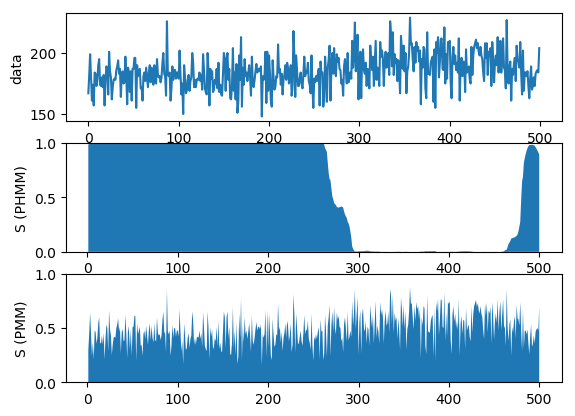

elapsed time: 1.362285644 seconds


In [6]:
###################################
## Example code
## for Bayesian Poisson HMM

using PyPlot, PyCall
using HDF5, JLD
@pyimport matplotlib.gridspec as gspec

push!(LOAD_PATH,".")
import PoissonHMM
import PoissonMixtureModel

"""
Simple comparison between HMM and mixture model.
"""
function test_comparison()
    #########################
    ## load data
    file_name = "data/timeseries.jld"
    X = load(file_name)["obs"]
    N = length(X)

    #########################
    ## Poison HMM

    ## set model
    K = 2 #  number of mixture components
    alpha_phi = 10.0 * ones(K)
    alpha_A = 100.0 * eye(K) + 1.0*ones(K, K)
    cmp = [PoissonHMM.Gam(1.0, 0.01), PoissonHMM.Gam(1.0, 0.01)]
    bhmm = PoissonHMM.BHMM(K, alpha_phi, alpha_A, cmp)
    
    ## inference
    max_iter = 100
    tic()
    Z_est_hmm, post_bhmm = PoissonHMM.learn_VI(X, bhmm, max_iter)
    toc()

    #########################
    ## Poison Mixture Model

    ## set model
    K = 2 #  number of mixture components
    alpha_phi = 10.0 * ones(K)
    cmp = [PoissonMixtureModel.Gam([1.0], 0.01), PoissonMixtureModel.Gam([1.0], 0.01)]
    bpmm = PoissonMixtureModel.BPMM(1, K, alpha_phi, cmp)
    
    ## inference
    max_iter = 100
    tic()
    Z_est_pmm, post_bpmm = PoissonMixtureModel.learn_VI(reshape(X, 1, N), bpmm, max_iter)
    toc()

    #########################
    ## Compare results
    figure("Hidden Markov Model vs Mixture Model")
    subplot(3,1,1);plot(X);ylabel("data")
    subplot(3,1,2);fill_between(1:N, reshape(Z_est_hmm[1,:]', N), zeros(N));ylim([0.0, 1.0]);ylabel("S (PHMM)")
    subplot(3,1,3);fill_between(1:N, reshape(Z_est_pmm[1,:]', N), zeros(N));ylim([0.0, 1.0]);ylabel("S (PMM)")
    show()
end

test_comparison()